# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 60.2 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 47.8 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 64.5 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 64.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 56.5 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 69.9 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 52.6 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 54.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 52.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 44.0 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.5 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=fb33d03828ee5371fd712c7b47adaf7d304245b8deeac77ab7e20961a8a74902
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                               ])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST('MNIST_data', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True) 

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST('MNIST_data', download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True) 

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

Neural networks work on tensors and our given input is in image format. Inorder to transform our input from image to tensor we need to use transforms.ToTensor() operation. In addition to that normalization is utilized which makes all inputs to have similar scales and resulting in faster and stable convergence during training. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

0


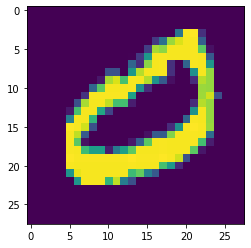

6


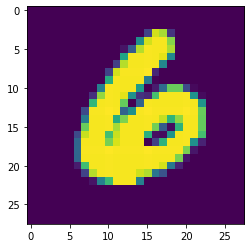

5


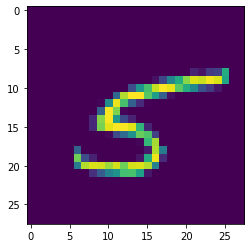

3


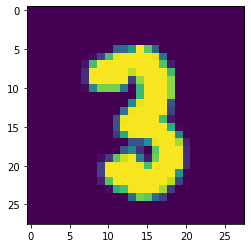

6


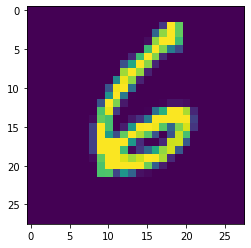

In [6]:
# Explore data
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()        
        self.fc1 = nn.Linear(784, 256)
        self.do1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(256, 64)
        self.do2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28) # flatten input image
        x = F.relu(self.fc1(x))
        x = self.do1(x)
        x = F.relu(self.fc2(x))
        x = self.do2(x)
        x = self.fc3(x)
        return x

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [9]:
# Instantiate the model
net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (do1): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (do2): Dropout(p=0.1, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
num_epochs = 15

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    total = 0
    for i, data in enumerate(trainloader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        total += labels.size(0)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct*100/total:.2f}% training loss: {train_loss/len(trainloader):.5f}')
    train_loss_history.append(train_loss/len(trainloader))


    val_loss = 0.0
    val_correct = 0
    total = 0
    net.eval()
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        total += labels.size(0)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct*100/total:.2f}% validation loss: {val_loss/len(testloader):.5f}')
    val_loss_history.append(val_loss/len(testloader))                

Epoch 1 training accuracy: 87.81% training loss: 0.39848
Epoch 1 validation accuracy: 94.31% validation loss: 0.18797
Epoch 2 training accuracy: 94.25% training loss: 0.18975
Epoch 2 validation accuracy: 95.90% validation loss: 0.13324
Epoch 3 training accuracy: 95.56% training loss: 0.14577
Epoch 3 validation accuracy: 96.20% validation loss: 0.11771
Epoch 4 training accuracy: 96.26% training loss: 0.12168
Epoch 4 validation accuracy: 96.50% validation loss: 0.11619
Epoch 5 training accuracy: 96.69% training loss: 0.10636
Epoch 5 validation accuracy: 96.32% validation loss: 0.11551
Epoch 6 training accuracy: 96.94% training loss: 0.09906
Epoch 6 validation accuracy: 97.19% validation loss: 0.09077
Epoch 7 training accuracy: 97.11% training loss: 0.09257
Epoch 7 validation accuracy: 97.22% validation loss: 0.09568
Epoch 8 training accuracy: 97.33% training loss: 0.08316
Epoch 8 validation accuracy: 97.61% validation loss: 0.08513
Epoch 9 training accuracy: 97.49% training loss: 0.07892

Plot the training loss (and validation loss/accuracy, if recorded).

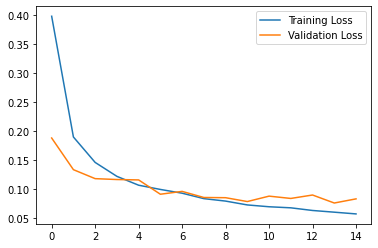

In [12]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [13]:
val_loss = 0.0
val_correct = 0
total = 0
net.eval()
for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    _, preds = torch.max(outputs.data, 1)
    total += labels.size(0)
    val_correct += (preds == labels).sum().item()
    val_loss += loss.item()
print(f'test accuracy: {val_correct*100/total:.2f}%')        

test accuracy: 97.71%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [14]:
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()        
        self.fc1 = nn.Linear(784, 256)
        self.do1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(256, 64)
        self.do2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28) # flatten input image
        x = F.relu(self.fc1(x))
        x = self.do1(x)
        x = F.relu(self.fc2(x))
        x = self.do2(x)
        x = self.fc3(x)
        return x
    
net = Net()
net.to(device)

# Choose an optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

num_epochs = 20

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    total = 0
    for i, data in enumerate(trainloader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        total += labels.size(0)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct*100/total:.2f}% training loss: {train_loss/len(trainloader):.5f}')
    train_loss_history.append(train_loss/len(trainloader))


    val_loss = 0.0
    val_correct = 0
    total = 0
    net.eval()
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        total += labels.size(0)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct*100/total:.2f}% validation loss: {val_loss/len(testloader):.5f}')
    val_loss_history.append(val_loss/len(testloader))          

Epoch 1 training accuracy: 84.59% training loss: 0.49723
Epoch 1 validation accuracy: 93.09% validation loss: 0.22562
Epoch 2 training accuracy: 93.17% training loss: 0.22782
Epoch 2 validation accuracy: 95.60% validation loss: 0.13665
Epoch 3 training accuracy: 94.69% training loss: 0.17569
Epoch 3 validation accuracy: 96.16% validation loss: 0.12410
Epoch 4 training accuracy: 95.46% training loss: 0.15011
Epoch 4 validation accuracy: 96.76% validation loss: 0.10541
Epoch 5 training accuracy: 96.04% training loss: 0.13134
Epoch 5 validation accuracy: 96.81% validation loss: 0.10196
Epoch 6 training accuracy: 96.41% training loss: 0.11870
Epoch 6 validation accuracy: 97.36% validation loss: 0.09054
Epoch 7 training accuracy: 96.65% training loss: 0.11081
Epoch 7 validation accuracy: 97.01% validation loss: 0.09220
Epoch 8 training accuracy: 97.05% training loss: 0.09662
Epoch 8 validation accuracy: 96.92% validation loss: 0.09710
Epoch 9 training accuracy: 97.23% training loss: 0.09216

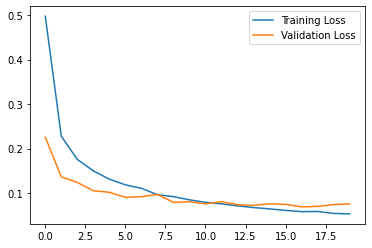

In [15]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [16]:
val_loss = 0.0
val_correct = 0
total = 0
net.eval()
for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    _, preds = torch.max(outputs.data, 1)
    total += labels.size(0)
    val_correct += (preds == labels).sum().item()
    val_loss += loss.item()
print(f'test accuracy: {val_correct*100/total:.2f}%')

test accuracy: 97.94%


In the improved model optimizer is updated from Adam to SGD, learning rate updated from 0.001 to 0.01 and epoch from 15 to 20. The accuracy has slight improvement from 97.71% to 97.94%. 

## Saving your model
Using `torch.save`, save your model for future loading.

In [17]:
torch.save(net,'project_2_mnist_model')